In [1]:
#https://nbviewer.org/github/theislab/scanpy_usage/blob/master/170501_moignard15/moignard15.ipynb
import scanpy as sc
import scirpy as ir

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from matplotlib import rcParams

In [4]:
path_filtered = '../preprocessing/hmgu_data_preproc/01_filtered_data.h5ad'
path_normalized = '../preprocessing/hmgu_data_preproc/02_normalized_data.h5ad'
path_high_var = '../preprocessing/hmgu_data_preproc/03_variableGenes_data.h5ad'
path_tcr = '../preprocessing/hmgu_data_preproc/04_merged_data.h5ad'
path_tcr_filtered = '../preprocessing/hmgu_data_preproc/05_tcr_filtered_data.h5ad'
path_tcr_anno = '../preprocessing/hmgu_data_preproc/06_tcr_annotation_data.h5ad'

adata = sc.read(path_tcr_anno)

In [5]:
adata

AnnData object with n_obs × n_vars = 10954 × 5000
    obs: 'Sample', 'donor', 'organ', 'sort', 'method', 'file', 'is_TRA_p', 'is_TRB_p', 'is_TRA_np', 'is_TRB_np', 'Age', 'Source', 'cell types', 'n_counts', 'log_counts', 'n_genes', 'mt_fraction', 'multi_chain', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_

In [6]:
adata.uns['iroot'] = 36 #can comment this in and out

In [7]:
sc.pp.neighbors(adata, n_neighbors=5, method='gauss', knn=False)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [9]:
sc.tl.diffmap(adata)

In [10]:
sc.tl.dpt(adata, n_branchings=1, n_dcs=10)

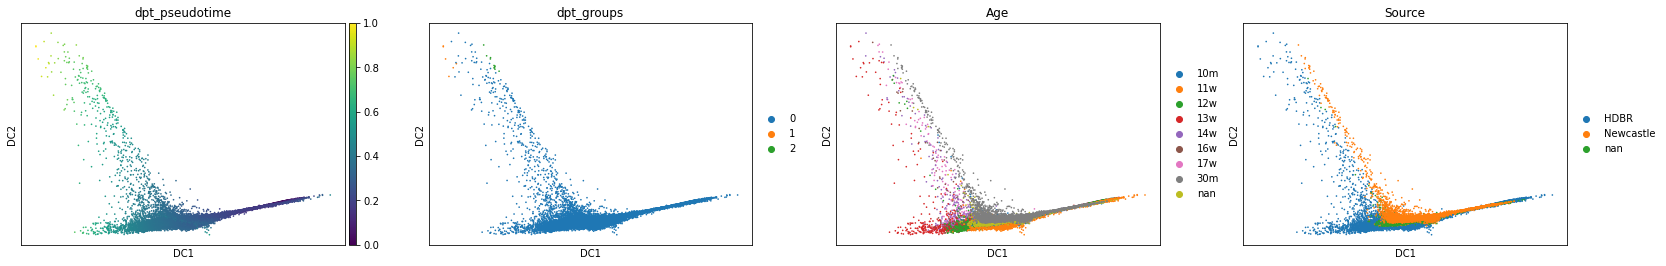

In [12]:
#sc.pl.diffmap(adata, color=['dpt_pseudotime', 'dpt_groups', 'exp_groups'])
sc.pl.diffmap(adata, color=['dpt_pseudotime', 'dpt_groups', 'Age','Source'])

C:\Users\Aubrey\anaconda3\envs\thymustcrs\lib\site-packages\scanpy\plotting\_utils.py:119: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, None]


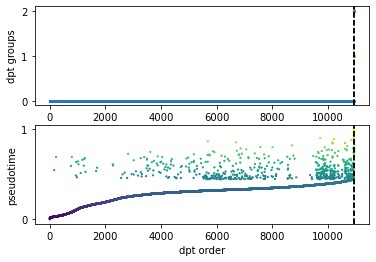

In [13]:
sc.pl.dpt_groups_pseudotime(adata)

ValueError: setting an array element with a sequence.

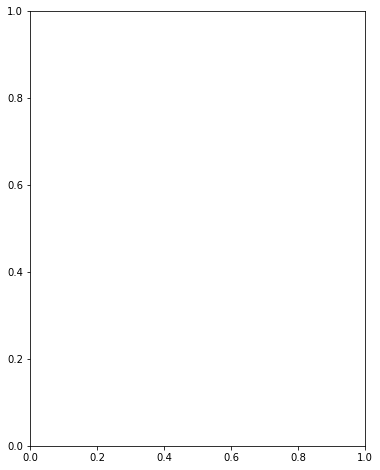

In [14]:
sc.pl.dpt_timeseries(adata)

In [ ]:
#not sure how to apply this to our data

adata.rename_categories('dpt_groups', ['undecided/endothelial', 'erythrocytes', 'trunk', 'endothelial'])

In [ ]:
sc.pl.diffmap(adata, color='dpt_groups')